# Bills of Mortality - Foodstuffs and Economic Analysis

This notebook analyzes bread prices and commodity data from the Bills of Mortality, providing insights into:
- Historical bread pricing and weight regulations
- Economic conditions and food security in early modern London
- Seasonal price variations and market dynamics
- Quality grades and measurement standards
- Commodity price relationships

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (15, 8)
warnings.filterwarnings('ignore')

# Data directory
DATA_DIR = Path('../data')

print("🍞 Bills of Mortality - Foodstuffs and Economic Analysis")
print("="*60)

🍞 Bills of Mortality - Foodstuffs and Economic Analysis


## Load and Prepare Data

In [2]:
# Load foodstuffs data
foodstuffs = pd.read_csv(DATA_DIR / 'foodstuffs.csv')

print(f"📊 Loaded {len(foodstuffs):,} foodstuffs records")
print(f"📅 Time range: {foodstuffs['year'].min()} - {foodstuffs['year'].max()}")
print(f"🗓️ Weeks covered: {foodstuffs['week'].nunique()} unique weeks")
print(f"🛒 Commodity categories: {foodstuffs['commodity_category'].unique()}")
print(f"🥖 Commodity types: {foodstuffs['commodity_type'].nunique()} unique types")

# Display basic structure
print(f"\n📋 Data Structure:")
print(foodstuffs.head())

print(f"\n✓ Data preparation complete")

📊 Loaded 140 foodstuffs records
📅 Time range: 1700 - 1701
🗓️ Weeks covered: 13 unique weeks
🛒 Commodity categories: ['bread' 'seasoning']
🥖 Commodity types: 2 unique types

📋 Data Structure:
   year  week unique_identifier  start_day start_month  end_day end_month  \
0  1700     1     1700-01-verso         17    December       24  December   
1  1700     1     1700-01-verso         17    December       24  December   
2  1700     1     1700-01-verso         17    December       24  December   
3  1700     1     1700-01-verso         17    December       24  December   
4  1700     1     1700-01-verso         17    December       24  December   

  commodity_category commodity_type quality_grade measurement_standard  \
0              bread  bread_general         white          troy_weight   
1              bread  bread_general       wheaten          troy_weight   
2              bread  bread_general     household          troy_weight   
3              bread  bread_general         white 

## Foodstuffs Overview and Distribution

In [3]:
# Commodity category and type breakdown
print("🛒 Commodity Analysis:")

category_counts = foodstuffs['commodity_category'].value_counts()
print(f"\nCommodity Categories:")
for category, count in category_counts.items():
    pct = count / len(foodstuffs) * 100
    print(f"  • {category}: {count:,} records ({pct:.1f}%)")

type_counts = foodstuffs['commodity_type'].value_counts()
print(f"\nCommodity Types:")
for commodity_type, count in type_counts.items():
    pct = count / len(foodstuffs) * 100
    print(f"  • {commodity_type}: {count:,} records ({pct:.1f}%)")

# Quality grades analysis
quality_counts = foodstuffs['quality_grade'].value_counts()
print(f"\n🌾 Quality Grades:")
for quality, count in quality_counts.items():
    if pd.notna(quality):
        pct = count / len(foodstuffs[foodstuffs['quality_grade'].notna()]) * 100
        print(f"  • {quality.title()}: {count:,} records ({pct:.1f}%)")

# Measurement standards
standard_counts = foodstuffs['measurement_standard'].value_counts()
print(f"\n⚖️ Measurement Standards:")
for standard, count in standard_counts.items():
    if pd.notna(standard):
        pct = count / len(foodstuffs[foodstuffs['measurement_standard'].notna()]) * 100
        print(f"  • {standard.replace('_', ' ').title()}: {count:,} records ({pct:.1f}%)")

🛒 Commodity Analysis:

Commodity Categories:
  • bread: 120 records (85.7%)
  • seasoning: 20 records (14.3%)

Commodity Types:
  • bread_general: 120 records (85.7%)
  • salt: 20 records (14.3%)

🌾 Quality Grades:
  • White: 40 records (33.3%)
  • Wheaten: 40 records (33.3%)
  • Household: 40 records (33.3%)

⚖️ Measurement Standards:
  • Troy Weight: 60 records (50.0%)
  • Common Weight: 60 records (50.0%)


## Bread Price Analysis

🥖 Bread Price Analysis (120 records)


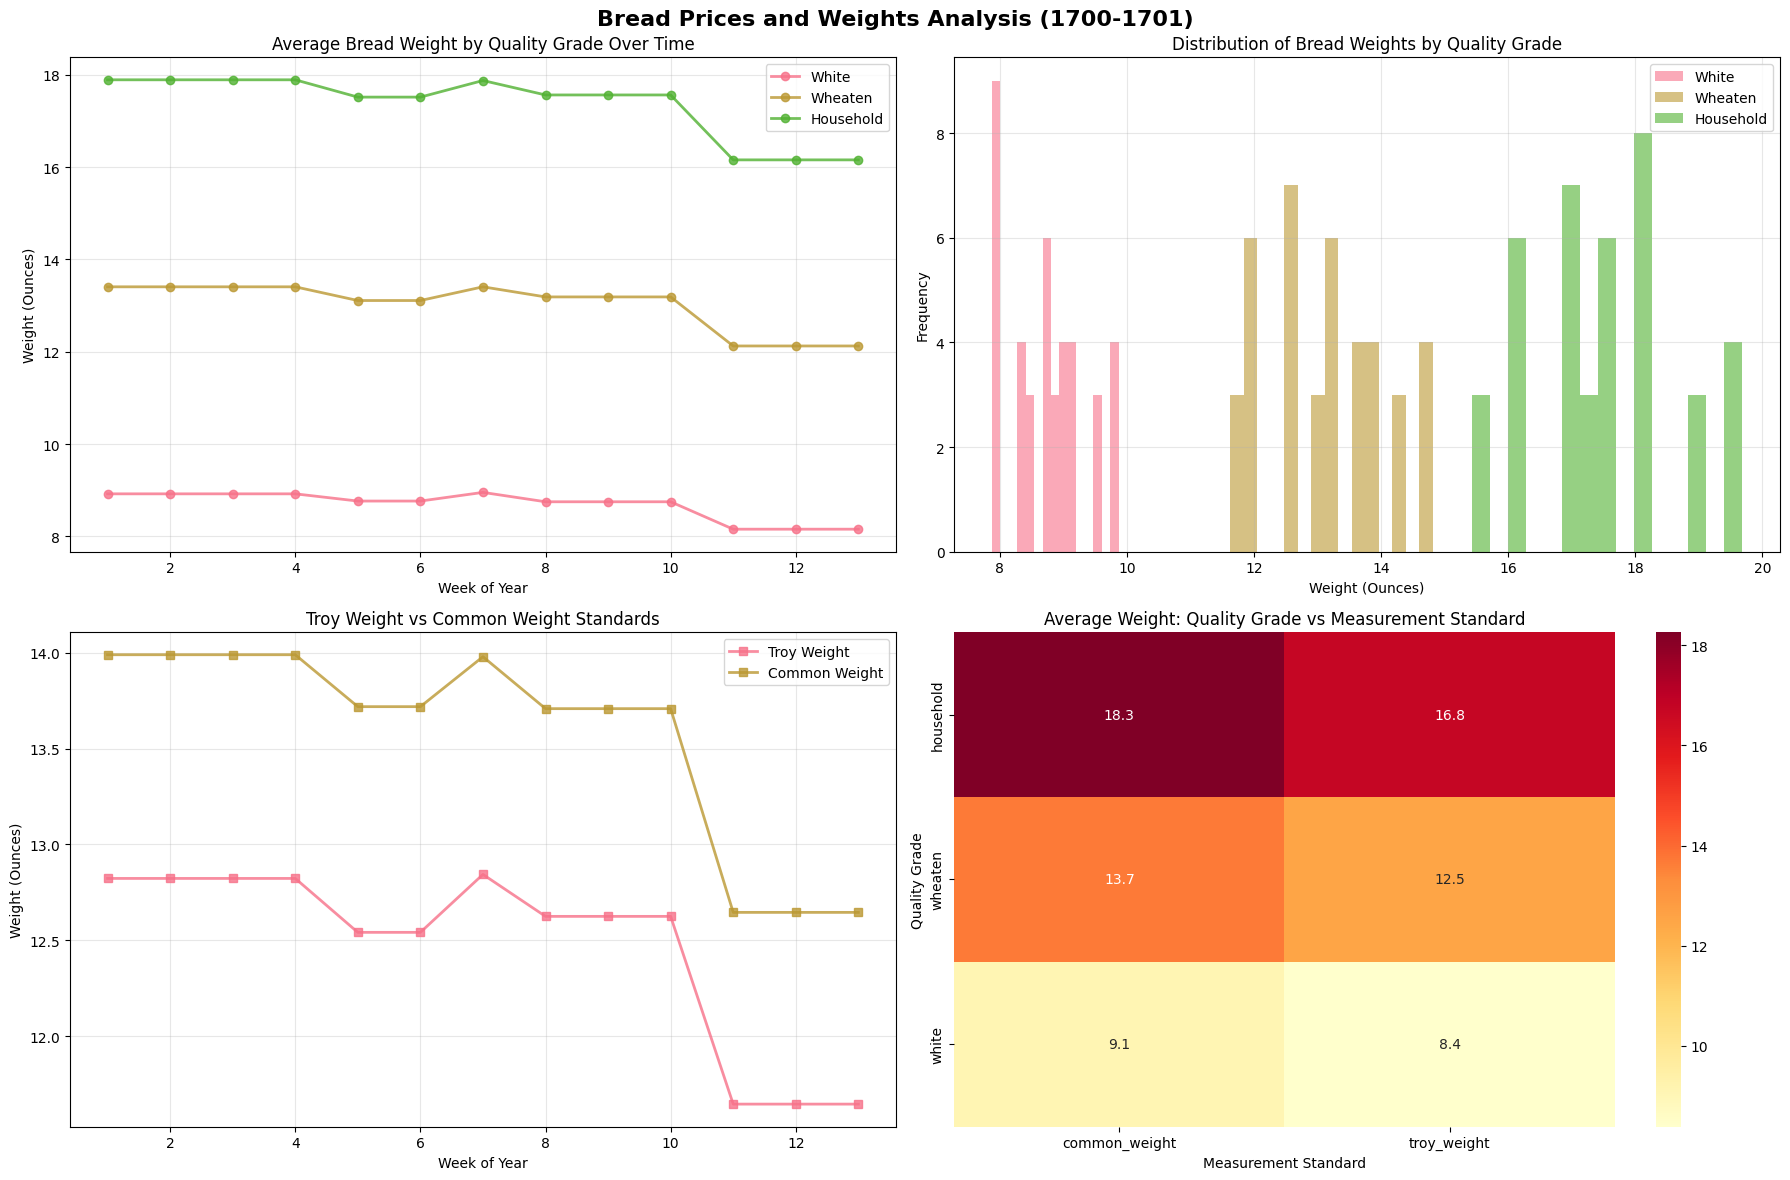


📊 Bread Weight Statistics:
               count       mean       std      min     25%      50%     75%  \
quality_grade                                                                 
household       40.0  17.504687  1.220188  15.4375  16.875  17.6250  18.250   
wheaten         40.0  13.121875  0.932513  11.6250  12.625  13.1875  13.750   
white           40.0   8.753125  0.604297   7.8750   8.375   8.7500   9.125   

                   max  
quality_grade           
household      19.6875  
wheaten        14.8125  
white           9.8750  


In [4]:
# Filter to bread data with weight information
bread_data = foodstuffs[
    (foodstuffs['commodity_category'] == 'bread') & 
    (foodstuffs['weight_ounces'].notna())
].copy()

print(f"🥖 Bread Price Analysis ({len(bread_data)} records)")

# Calculate total weight in ounces
bread_data['total_weight_ounces'] = (
    bread_data['weight_pounds'].fillna(0) * 16 + 
    bread_data['weight_ounces'].fillna(0) + 
    bread_data['weight_drams'].fillna(0) / 16
)

# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Bread Prices and Weights Analysis (1700-1701)', fontsize=16, fontweight='bold')

# 1. Weight by quality grade over time
for quality in bread_data['quality_grade'].unique():
    if pd.notna(quality):
        quality_data = bread_data[bread_data['quality_grade'] == quality]
        weekly_avg = quality_data.groupby('week')['total_weight_ounces'].mean()
        axes[0,0].plot(weekly_avg.index, weekly_avg.values, 
                      marker='o', linewidth=2, label=quality.title(), alpha=0.8)

axes[0,0].set_title('Average Bread Weight by Quality Grade Over Time')
axes[0,0].set_xlabel('Week of Year')
axes[0,0].set_ylabel('Weight (Ounces)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Weight distribution by quality grade
quality_grades = bread_data['quality_grade'].dropna().unique()
for i, quality in enumerate(quality_grades):
    quality_weights = bread_data[bread_data['quality_grade'] == quality]['total_weight_ounces']
    axes[0,1].hist(quality_weights, alpha=0.6, label=quality.title(), bins=15)

axes[0,1].set_title('Distribution of Bread Weights by Quality Grade')
axes[0,1].set_xlabel('Weight (Ounces)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Troy vs Common Weight comparison
for standard in bread_data['measurement_standard'].unique():
    if pd.notna(standard):
        standard_data = bread_data[bread_data['measurement_standard'] == standard]
        weekly_avg = standard_data.groupby('week')['total_weight_ounces'].mean()
        axes[1,0].plot(weekly_avg.index, weekly_avg.values, 
                      marker='s', linewidth=2, label=standard.replace('_', ' ').title(), alpha=0.8)

axes[1,0].set_title('Troy Weight vs Common Weight Standards')
axes[1,0].set_xlabel('Week of Year')
axes[1,0].set_ylabel('Weight (Ounces)')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Quality grade vs measurement standard heatmap
weight_pivot = bread_data.pivot_table(
    values='total_weight_ounces', 
    index='quality_grade', 
    columns='measurement_standard', 
    aggfunc='mean'
)
sns.heatmap(weight_pivot, annot=True, fmt='.1f', ax=axes[1,1], cmap='YlOrRd')
axes[1,1].set_title('Average Weight: Quality Grade vs Measurement Standard')
axes[1,1].set_xlabel('Measurement Standard')
axes[1,1].set_ylabel('Quality Grade')

plt.tight_layout()
plt.show()

# Statistical summary
print(f"\n📊 Bread Weight Statistics:")
weight_stats = bread_data.groupby('quality_grade')['total_weight_ounces'].describe()
print(weight_stats)

## Historical Bread Pricing Context

💰 Historical Bread Pricing System Analysis

The 'Penny Loaf' system regulated bread prices by fixing the price and varying the weight.
Quality grades reflected different flour types and processing:
  • White: Finest flour, highest quality, lightest weight for same price
  • Wheaten: Medium quality, whole wheat flour
  • Household: Coarsest flour, heaviest weight for same price

🥖 Penny Loaf Analysis (120 records):
                                         mean       std  count
quality_grade measurement_standard                            
household     common_weight         18.256250  0.972462     20
              troy_weight           16.753125  0.959817     20
wheaten       common_weight         13.700000  0.757799     20
              troy_weight           12.543750  0.712061     20
white         common_weight          9.115625  0.509480     20
              troy_weight            8.390625  0.461902     20

💡 Value Analysis (Weight per Penny):
  • White bread: 8.8 ounces per penny
  

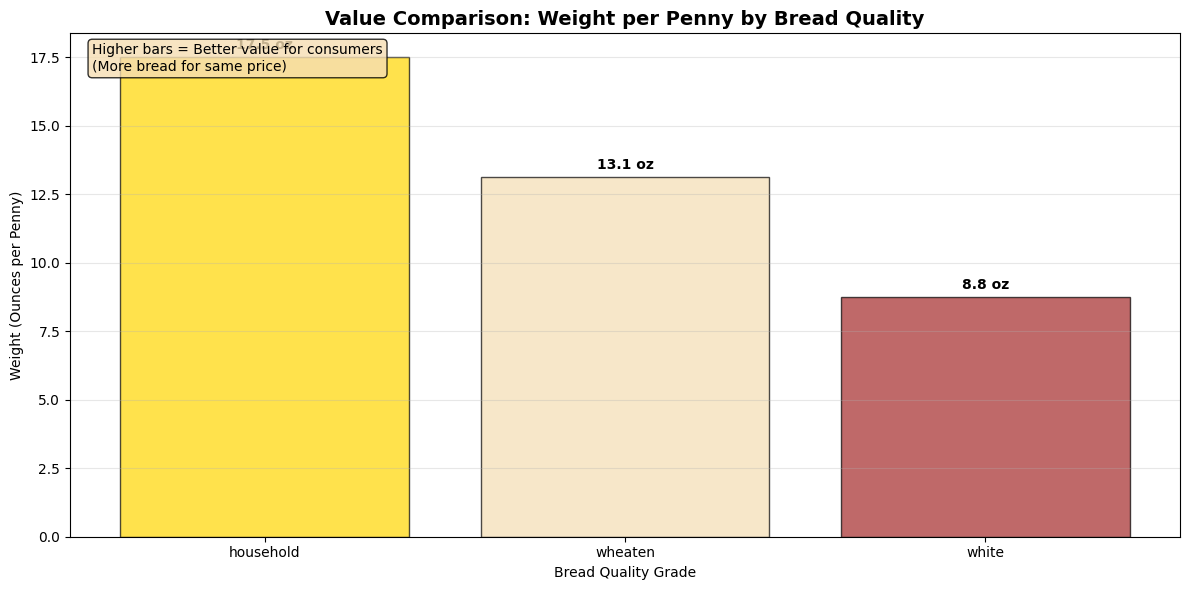

In [5]:
# Analyze the penny loaf system
print("💰 Historical Bread Pricing System Analysis")
print("\nThe 'Penny Loaf' system regulated bread prices by fixing the price and varying the weight.")
print("Quality grades reflected different flour types and processing:")
print("  • White: Finest flour, highest quality, lightest weight for same price")
print("  • Wheaten: Medium quality, whole wheat flour")
print("  • Household: Coarsest flour, heaviest weight for same price")

# Calculate price efficiency (weight per penny)
penny_loaf_data = bread_data[bread_data['column_name'].str.contains('penny_loaf', case=False, na=False)]

if len(penny_loaf_data) > 0:
    print(f"\n🥖 Penny Loaf Analysis ({len(penny_loaf_data)} records):")
    
    penny_stats = penny_loaf_data.groupby(['quality_grade', 'measurement_standard'])['total_weight_ounces'].agg(['mean', 'std', 'count'])
    print(penny_stats)
    
    # Value comparison
    print(f"\n💡 Value Analysis (Weight per Penny):")
    for quality in penny_loaf_data['quality_grade'].unique():
        if pd.notna(quality):
            avg_weight = penny_loaf_data[penny_loaf_data['quality_grade'] == quality]['total_weight_ounces'].mean()
            print(f"  • {quality.title()} bread: {avg_weight:.1f} ounces per penny")
    
    # Create value comparison chart
    plt.figure(figsize=(12, 6))
    
    quality_means = penny_loaf_data.groupby('quality_grade')['total_weight_ounces'].mean()
    colors = ['gold', 'wheat', 'brown']
    
    bars = plt.bar(quality_means.index, quality_means.values, 
                   color=colors[:len(quality_means)], alpha=0.7, edgecolor='black')
    
    # Add value labels on bars
    for bar, value in zip(bars, quality_means.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2, 
                f'{value:.1f} oz', ha='center', va='bottom', fontweight='bold')
    
    plt.title('Value Comparison: Weight per Penny by Bread Quality', fontsize=14, fontweight='bold')
    plt.xlabel('Bread Quality Grade')
    plt.ylabel('Weight (Ounces per Penny)')
    plt.grid(True, alpha=0.3, axis='y')
    
    # Add explanatory text
    plt.text(0.02, 0.98, 'Higher bars = Better value for consumers\n(More bread for same price)', 
             transform=plt.gca().transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

## Salt and Other Commodities

🧂 Salt Price Analysis (20 records)

Salt Price Data:
    year  week                 raw_value  price_shillings
6   1700     1   56 l. to the Bushel 5 s              5.0
13  1700     2   56 l. to the Bushel 5 s              5.0
20  1700     3    56 l to the Bushel 5 s              5.0
27  1700     4  56 l. to the Bushel 5 s.              5.0
34  1700     5    56 l to the Bushel 5 s              5.0
41  1700     6  56 l. to the Bushel 5 s.              5.0
48  1700     7  56 l. to the Bushel 5 s.              5.0
55  1700     8  56 l. to the Bushel 5 s.              5.0
62  1700     9  56 l. to the Bushel 5 s.              5.0
69  1700    10  56 l. to the Bushel 5 s.              5.0


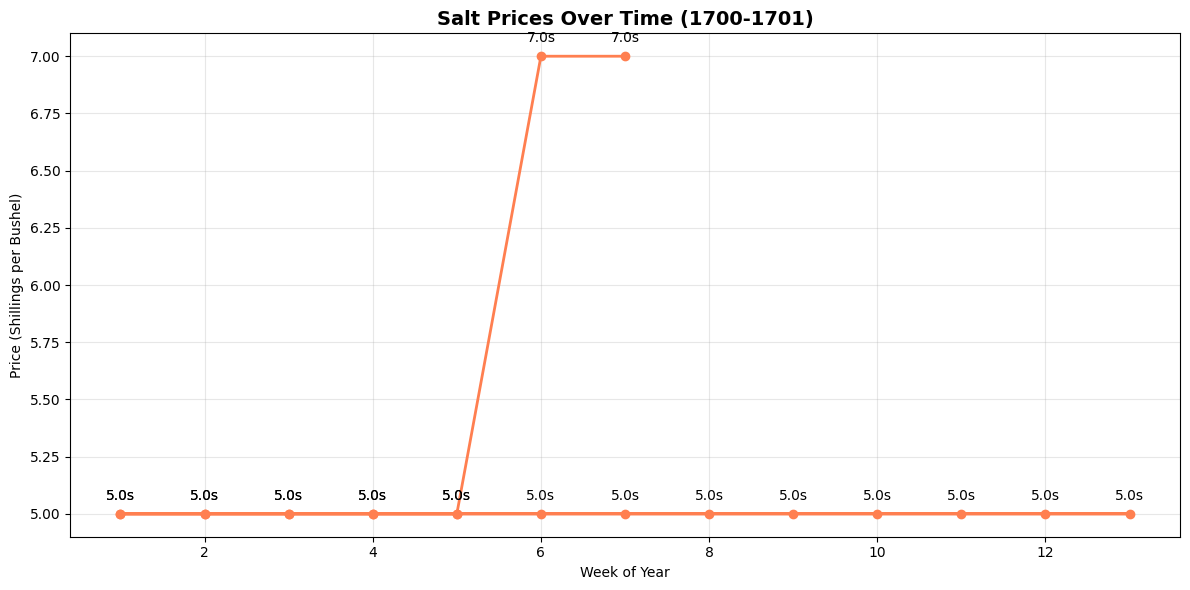


📊 Salt Price Statistics:
  • Average price: 5.2 shillings per bushel
  • Price range: 5.0-7.0 shillings
  • Price stability: Stable

🛒 Commodity Summary:
                    first_year  last_year  weeks_covered  types  total_records
commodity_category                                                            
bread                     1700       1701             13      1            120
seasoning                 1700       1701             13      1             20


In [6]:
# Analyze salt prices
salt_data = foodstuffs[foodstuffs['commodity_category'] == 'seasoning']

print(f"🧂 Salt Price Analysis ({len(salt_data)} records)")

if len(salt_data) > 0:
    print(f"\nSalt Price Data:")
    print(salt_data[['year', 'week', 'raw_value', 'price_shillings']].head(10))
    
    # Extract price trends
    salt_prices = salt_data[salt_data['price_shillings'].notna()]
    if len(salt_prices) > 0:
        plt.figure(figsize=(12, 6))
        
        # Plot salt prices over time
        plt.plot(salt_prices['week'], salt_prices['price_shillings'], 
                marker='o', linewidth=2, markersize=6, color='coral')
        
        plt.title('Salt Prices Over Time (1700-1701)', fontsize=14, fontweight='bold')
        plt.xlabel('Week of Year')
        plt.ylabel('Price (Shillings per Bushel)')
        plt.grid(True, alpha=0.3)
        
        # Add price labels
        for _, row in salt_prices.iterrows():
            plt.annotate(f"{row['price_shillings']}s", 
                        (row['week'], row['price_shillings']),
                        textcoords="offset points", xytext=(0,10), ha='center')
        
        plt.tight_layout()
        plt.show()
        
        # Price statistics
        print(f"\n📊 Salt Price Statistics:")
        print(f"  • Average price: {salt_prices['price_shillings'].mean():.1f} shillings per bushel")
        print(f"  • Price range: {salt_prices['price_shillings'].min()}-{salt_prices['price_shillings'].max()} shillings")
        print(f"  • Price stability: {'Stable' if salt_prices['price_shillings'].std() < 1 else 'Variable'}")
else:
    print("No salt price data available in current dataset")

# Summary of all commodities
print(f"\n🛒 Commodity Summary:")
commodity_summary = foodstuffs.groupby('commodity_category').agg({
    'year': ['min', 'max'],
    'week': 'nunique',
    'commodity_type': 'nunique',
    'raw_value': 'count'
})
commodity_summary.columns = ['first_year', 'last_year', 'weeks_covered', 'types', 'total_records']
print(commodity_summary)

## Seasonal and Temporal Patterns

🗓️ Seasonal Patterns in Food Prices


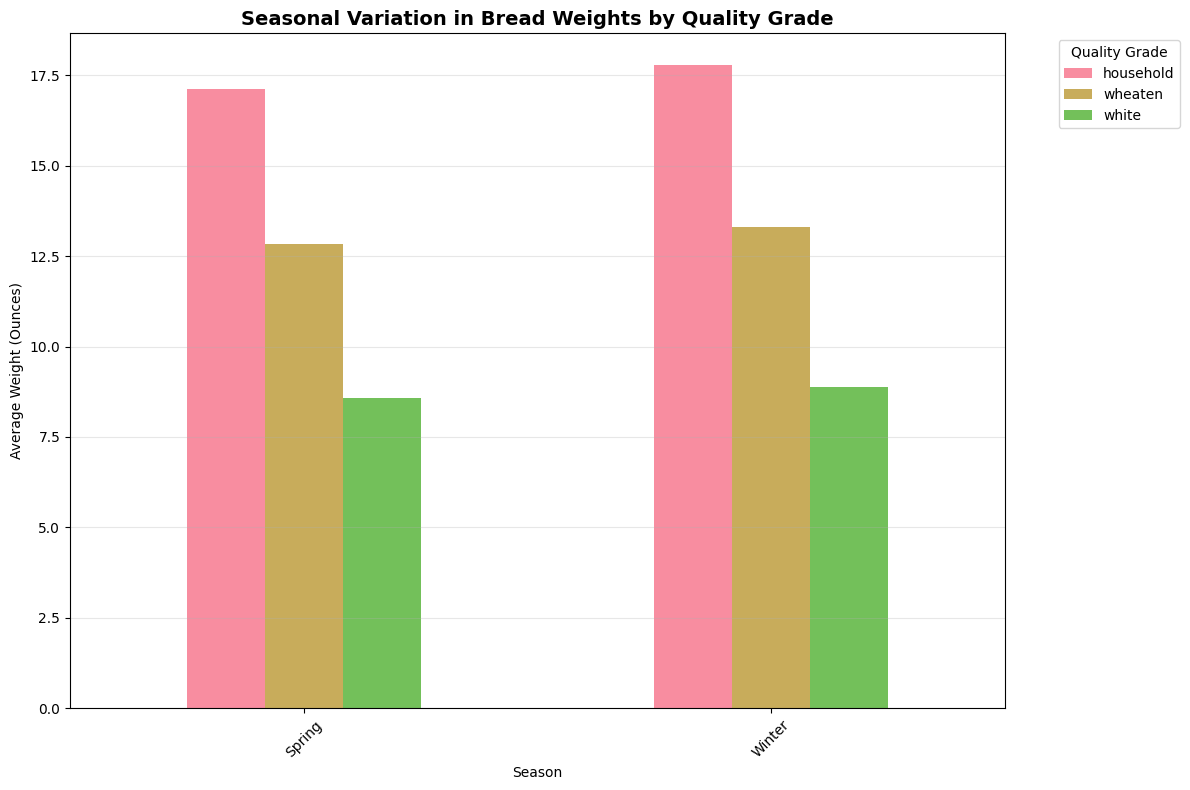


🌍 Seasonal Statistics:
quality_grade  household    wheaten     white
season                                       
Spring         17.113281  12.843750  8.578125
Winter         17.765625  13.307292  8.869792


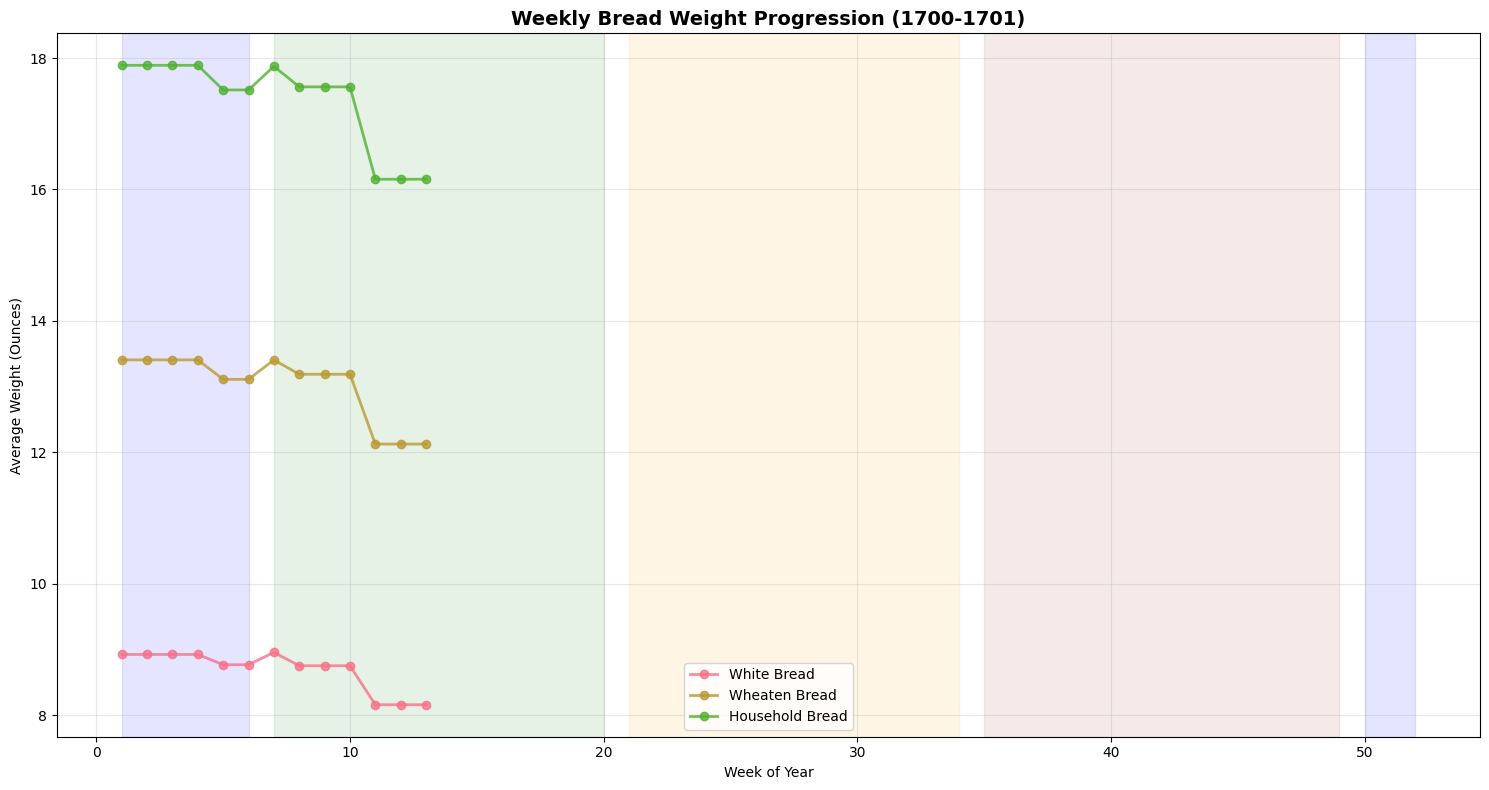

In [7]:
# Seasonal analysis of bread weights
print("🗓️ Seasonal Patterns in Food Prices")

# Add season classification based on week
def classify_season(week):
    if pd.isna(week):
        return 'Unknown'
    elif week in [1, 2, 3, 4, 5, 6, 50, 51, 52]:
        return 'Winter'
    elif week in range(7, 21):
        return 'Spring'
    elif week in range(21, 35):
        return 'Summer'
    elif week in range(35, 50):
        return 'Autumn'
    else:
        return 'Unknown'

foodstuffs['season'] = foodstuffs['week'].apply(classify_season)

# Seasonal bread weight analysis
seasonal_bread = bread_data.copy()
seasonal_bread['season'] = seasonal_bread['week'].apply(classify_season)

if len(seasonal_bread) > 0:
    seasonal_stats = seasonal_bread.groupby(['season', 'quality_grade'])['total_weight_ounces'].mean().unstack('quality_grade')
    
    plt.figure(figsize=(12, 8))
    seasonal_stats.plot(kind='bar', ax=plt.gca(), alpha=0.8)
    plt.title('Seasonal Variation in Bread Weights by Quality Grade', fontsize=14, fontweight='bold')
    plt.xlabel('Season')
    plt.ylabel('Average Weight (Ounces)')
    plt.legend(title='Quality Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
    
    print(f"\n🌍 Seasonal Statistics:")
    print(seasonal_stats)

# Weekly progression analysis
if len(bread_data) > 0:
    plt.figure(figsize=(15, 8))
    
    # Plot each quality grade separately
    for quality in bread_data['quality_grade'].unique():
        if pd.notna(quality):
            quality_data = bread_data[bread_data['quality_grade'] == quality]
            weekly_weights = quality_data.groupby('week')['total_weight_ounces'].mean()
            
            plt.plot(weekly_weights.index, weekly_weights.values, 
                    marker='o', linewidth=2, label=f'{quality.title()} Bread', alpha=0.8)
    
    plt.title('Weekly Bread Weight Progression (1700-1701)', fontsize=14, fontweight='bold')
    plt.xlabel('Week of Year')
    plt.ylabel('Average Weight (Ounces)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Add seasonal shading
    plt.axvspan(1, 6, alpha=0.1, color='blue', label='Winter')
    plt.axvspan(7, 20, alpha=0.1, color='green', label='Spring')
    plt.axvspan(21, 34, alpha=0.1, color='orange', label='Summer')
    plt.axvspan(35, 49, alpha=0.1, color='brown', label='Autumn')
    plt.axvspan(50, 52, alpha=0.1, color='blue')
    
    plt.tight_layout()
    plt.show()

## Economic and Historical Context

In [8]:
# Economic analysis and interpretation
print("💰 Economic and Historical Context Analysis")
print("="*50)

# Calculate bread affordability metrics
if len(bread_data) > 0:
    print(f"\n🥖 Bread Market Analysis (1700-1701):")
    
    # Weight efficiency by quality
    quality_efficiency = bread_data.groupby('quality_grade')['total_weight_ounces'].mean().sort_values(ascending=False)
    print(f"\nWeight per Penny (Best to Worst Value):")
    for quality, weight in quality_efficiency.items():
        print(f"  • {quality.title()}: {weight:.1f} ounces per penny")
    
    # Calculate value ratios
    if len(quality_efficiency) >= 2:
        household_weight = quality_efficiency.get('household', 0)
        white_weight = quality_efficiency.get('white', 0)
        
        if household_weight > 0 and white_weight > 0:
            value_ratio = household_weight / white_weight
            print(f"\n📊 Economic Insight:")
            print(f"  • Household bread provided {value_ratio:.1f}x more weight than white bread for same price")
            print(f"  • This reflects the class-based food system of early modern London")
            print(f"  • Wealthy consumers paid premium for refined white bread")
            print(f"  • Working classes got better nutritional value from coarser bread")

# Historical context information
print(f"\n📚 Historical Context (1700-1701):")
print(f"\nThis period represents:")
print(f"  • End of the Nine Years' War (1688-1697)")
print(f"  • Economic recovery and market stabilization")
print(f"  • Established bread assizes (price/weight regulations)")
print(f"  • Transition period before War of Spanish Succession (1701-1714)")

print(f"\nBread Regulation System:")
print(f"  • Assizes regulated bread prices and weights")
print(f"  • Prices were fixed, weights varied with grain costs")
print(f"  • Different standards: Troy weight (precious metals) vs Common weight")
print(f"  • Quality grades ensured fair pricing across social classes")

# Data quality and limitations
print(f"\n⚠️ Data Limitations:")
print(f"  • Limited to {foodstuffs['year'].nunique()} years of data ({foodstuffs['year'].min()}-{foodstuffs['year'].max()})")
print(f"  • Only {len(foodstuffs)} total records across {foodstuffs['week'].nunique()} weeks")
print(f"  • Focused on London market, may not represent broader England")
print(f"  • Administrative records may have gaps or inconsistencies")

# Research implications
print(f"\n🔬 Research Implications:")
print(f"  • Provides quantitative data on early modern food economics")
print(f"  • Demonstrates regulatory mechanisms for essential commodities")
print(f"  • Reveals social stratification through food quality/pricing")
print(f"  • Connects mortality data to economic conditions")
print(f"  • Enables analysis of food security and public health")

💰 Economic and Historical Context Analysis

🥖 Bread Market Analysis (1700-1701):

Weight per Penny (Best to Worst Value):
  • Household: 17.5 ounces per penny
  • Wheaten: 13.1 ounces per penny
  • White: 8.8 ounces per penny

📊 Economic Insight:
  • Household bread provided 2.0x more weight than white bread for same price
  • This reflects the class-based food system of early modern London
  • Wealthy consumers paid premium for refined white bread
  • Working classes got better nutritional value from coarser bread

📚 Historical Context (1700-1701):

This period represents:
  • End of the Nine Years' War (1688-1697)
  • Economic recovery and market stabilization
  • Established bread assizes (price/weight regulations)
  • Transition period before War of Spanish Succession (1701-1714)

Bread Regulation System:
  • Assizes regulated bread prices and weights
  • Prices were fixed, weights varied with grain costs
  • Different standards: Troy weight (precious metals) vs Common weight
  • Q